In [18]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.preprocessing import MinMaxScaler

In [19]:
df=pd.read_csv('cgpa.csv')
df

,cgpa,iq
0,9,70
1,5,50
2,6,65
3,4,45
4,8,80
5,2,40
6,1,90
7,7,66
8,3,43


In [20]:
scaler=MinMaxScaler()
df[['cgpa','iq']] = scaler.fit_transform(df[['cgpa','iq']])
df

,cgpa,iq
0,1.000,0.60
1,0.500,0.20
2,0.625,0.50
3,0.375,0.10
4,0.875,0.80
5,0.125,0.00
6,0.000,1.00
7,0.750,0.52
8,0.250,0.06


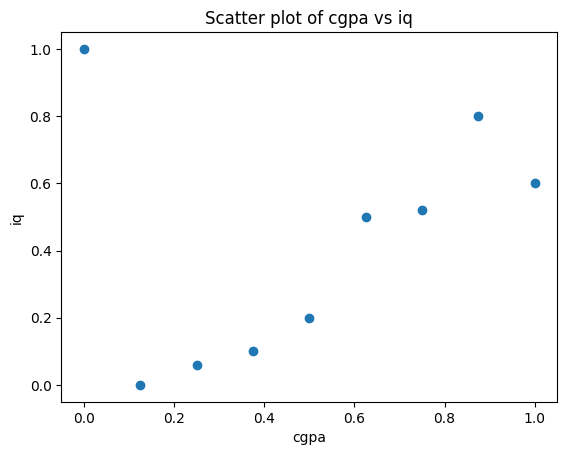

In [21]:
plt.scatter(df['cgpa'],df['iq'])
plt.title("Scatter plot of cgpa vs iq")
plt.xlabel("cgpa")
plt.ylabel("iq")
plt.show()

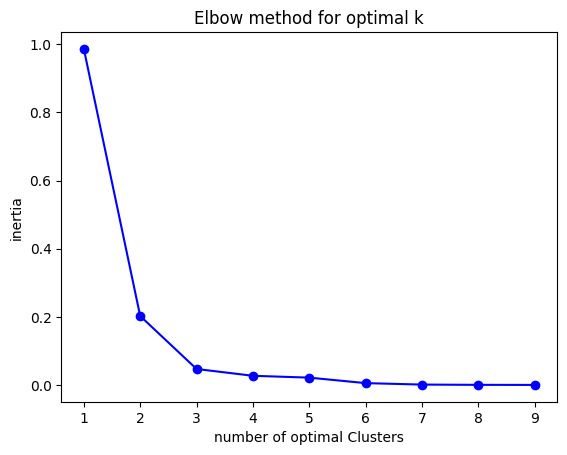

In [22]:
inertia=[]
k_values = range(1,10)
for k in k_values:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df[['iq']],df[['cgpa']])
    inertia.append(kmeans.inertia_)

plt.plot(k_values,inertia,'bo-')
plt.title("Elbow method for optimal k")
plt.xlabel("number of optimal Clusters")
plt.ylabel("inertia")
plt.show()

In [23]:
km=KMeans(n_clusters=3)
km.fit(df[['cgpa','iq']])

KMeans(n_clusters=3)

In [24]:
df['Clusters']=km.labels_
df

,cgpa,iq,Clusters
0,1.000,0.60,1
1,0.500,0.20,0
2,0.625,0.50,1
3,0.375,0.10,0
4,0.875,0.80,1
5,0.125,0.00,0
6,0.000,1.00,2
7,0.750,0.52,1
8,0.250,0.06,0


Initial Centroids:
[[0.3125 0.09  ]
 [0.8125 0.605 ]
 [0.     1.    ]]


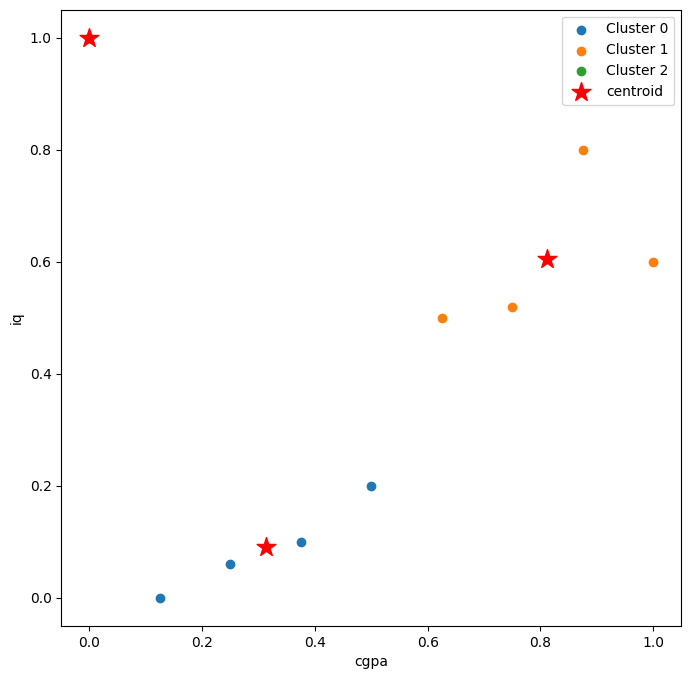

In [27]:
scaler=MinMaxScaler()
df[['cgpa','iq']] = scaler.fit_transform(df[['cgpa','iq']])
# Initialize Centroids 
centers = km.cluster_centers_ 
print(f'Initial Centroids:\n{centers}')
plt.figure(figsize=(8,8))
for cluster in range(3):
    cluster_data = df[df['Clusters']==cluster]
    plt.scatter(cluster_data['cgpa'],cluster_data['iq'],label=f'Cluster {cluster}')

centers_scaled = scaler.inverse_transform(centers)
plt.scatter(centers_scaled[:,0],centers_scaled[:,1],s=200,c='red',marker='*',label='centroid')
plt.xlabel('cgpa')
plt.ylabel('iq')
plt.legend()
plt.show()

In [33]:
km=KMeans(n_clusters=3)
km.fit(df[['cgpa','iq']])

KMeans(n_clusters=3)

In [34]:
df['Clusters']=km.labels_
df

,cgpa,iq,Clusters
0,1.000,0.60,1
1,0.500,0.20,0
2,0.625,0.50,1
3,0.375,0.10,0
4,0.875,0.80,1
5,0.125,0.00,0
6,0.000,1.00,2
7,0.750,0.52,1
8,0.250,0.06,0


Initial Centroids:
[[0.3125 0.09  ]
 [0.8125 0.605 ]
 [0.     1.    ]]


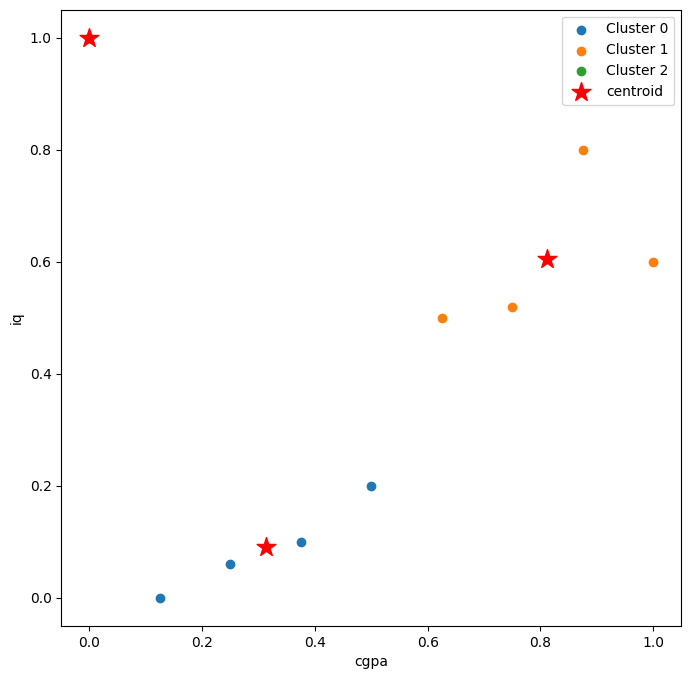

In [35]:
# Initialize Centroids 
centers = km.cluster_centers_ 
print(f'Initial Centroids:\n{centers}')
plt.figure(figsize=(8,8))
for cluster in range(3):
    cluster_data = df[df['Clusters']==cluster]
    plt.scatter(cluster_data['cgpa'],cluster_data['iq'],label=f'Cluster {cluster}')

centers_scaled = scaler.inverse_transform(centers)
plt.scatter(centers_scaled[:,0],centers_scaled[:,1],s=200,c='red',marker='*',label='centroid')
plt.xlabel('cgpa')
plt.ylabel('iq')
plt.legend()
plt.show()

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Fit the scaler and the KMeans model with two features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['cgpa', 'iq']])

km = KMeans(n_clusters=3)
km.fit(scaled_features)

# Now try predicting with new data
new_data = [[5, 30]]
new_data_scaled = scaler.transform(new_data)
predicted_cluster = km.predict(new_data_scaled)
print(f'The predicted cluster is: {predicted_cluster[0]}')


The predicted cluster is: 0


C:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
